<font size=3 color='blue'>
    
# <center> Tarea 2,  fecha de entrega: febrero 21 del 2025 </center>

In [86]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

In [87]:
import os
from IPython.display import Image, display
#os.chdir('/content/drive/MyDrive/tsfci-2025-2/Clase03')

<font size=4 color=blue>Pregunta 1: ¿Cuál es la diferencia entre hiperparámetro y parámetro?, da un ejemplo de cada uno. (1/2 punto)

Los parámetros son aquellos que van cambiando mientras el modelo aprende para mejorar su aproximación a partir del entrenamiento, mientras que los hiperparámetros no cambian con el entrenamiento, es un valor que se queda constante y se elige personalmente. 

<font size=4 color=blue>Pregunta 2: ¿Por qué se ordenan aleatoriamente los datos? (1/2 punto)

En el caso en el que haya errores en los datos en algún punto del experimeno, medición, encuesta o lo que sea que se trabaje eso hace que el modelo no influya al momento de aprender y pueda dar una predicción buena a lo que se pida. 

<font size=4 color=blue>Pregunta 3: Gradiente descendente. (2 puntos)


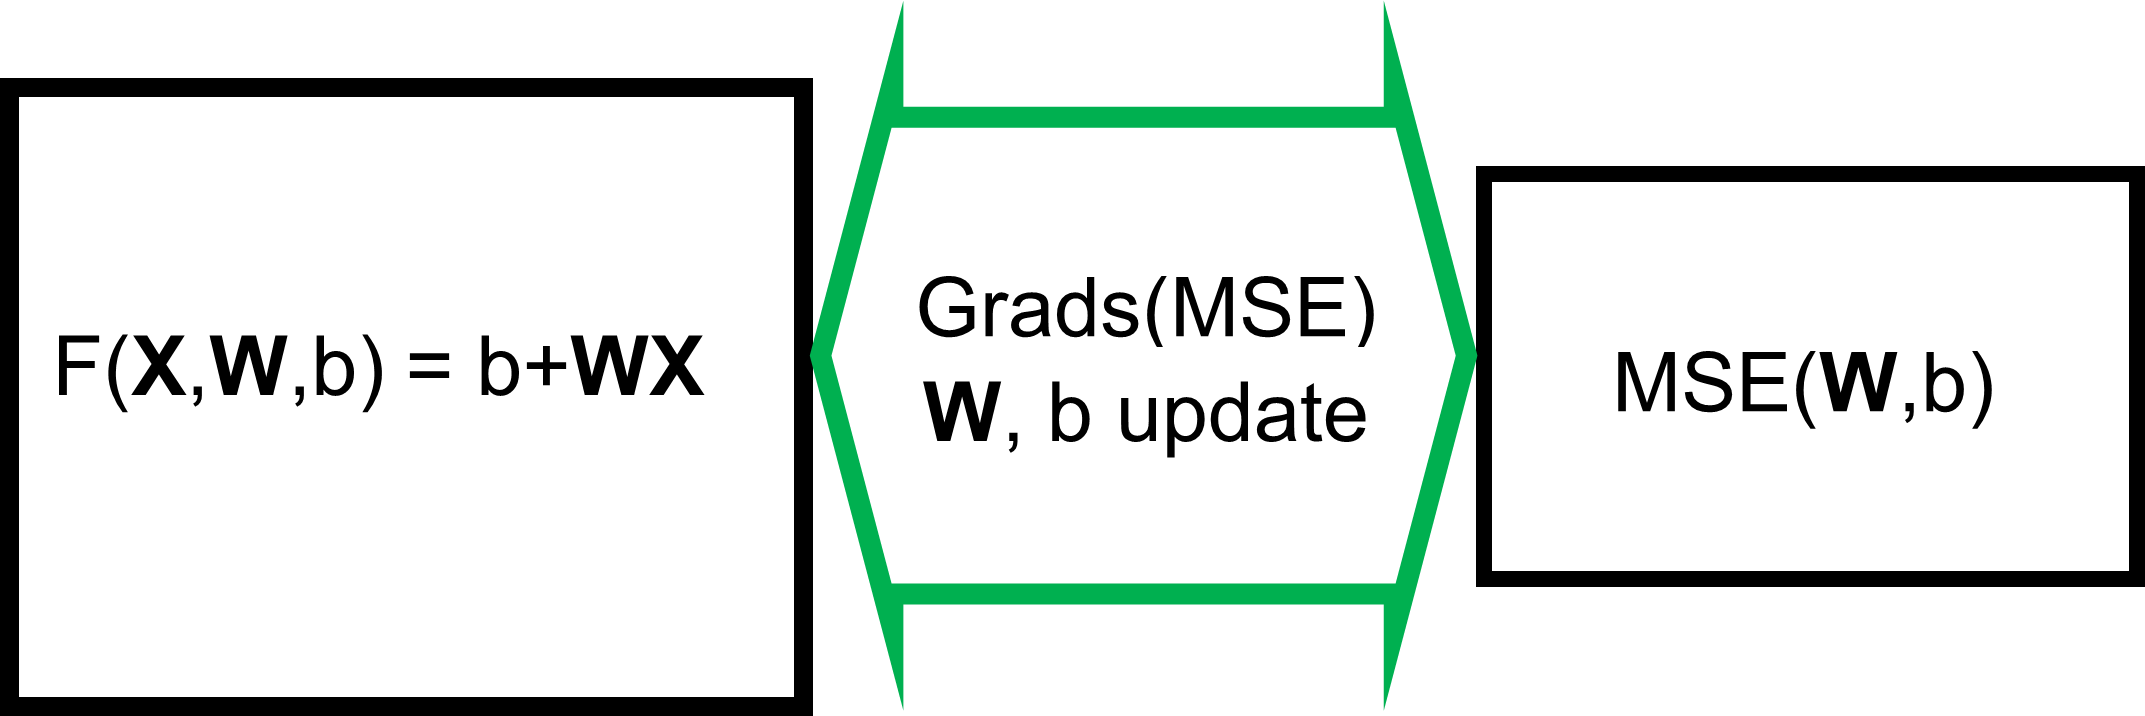

In [88]:
Image(filename='./images/W-b-update.png',width=620)

El método iterativo del gradiente descendente es la forma en la que las redes neuronales **"aprenden"**, hay aún algunos detalles que no les hemos platicado, sin embargo, la importancia de este método es inegable en IA.

Utilizando el **ejemplo visto en clase**, explica el método de **gradiente descendente** siguiendo estos puntos:


- Escribe las ecuaciones del método de gradiente descendente (vistas en clase) y explica cada uno de sus términos.

- Redacta tu explicación **basándote en el diagrama** presentado en clase (diagrama de arriba), relacionándolo con las ecuaciones.  

- Despues de cada iteración, ¿qué es lo que se actualiza?, ¿cuál es la importancia de ello?

- ¿Por qué es crucial calcular el **gradiente de la función de error (MSE)**?¿Cuál es la interpretación geometríca de esto?
  
- ¿Qué representa $\alpha$ y cómo afecta el comportamiento del algoritmo?  
- ¿Qué sucede si $\alpha$ es demasiado grande o demasiado pequeño?


1.- Damos una función de pérdida o métrica con la que vamos a hacer que nustro modelo aprenda que en el caso de la clase fue mínimos cuadrados:

$$ MSE = \dfrac{1}{m}∑_{i=1}^{m}(F(x_i,W,b) - y_i)^{2} = \dfrac{1}{m}∑_{i=1}^{m}(W x_i + b -y_i)^2 $$

Después obtenemos las derivadas de los parámetros que en este caso son W y b, entonces quedan como:

$$ \dfrac{\partial MSE(W, b)}{\partial W} = \dfrac{2}{m}∑_{i=1}^{m}[(W x_i + b -y_i)(x_i)]$$

$$ \dfrac{\partial MSE(W, b)}{\partial b} = \dfrac{2}{m}∑_{i=1}^{m}[(W x_i + b -y_i)]$$

Por último el método de gradiente descendiente se aplica con:

$$ W_{nuevo} = W_{viejo} + \alpha \dfrac{\partial MSE(W, b)}{\partial W} $$

$$ b_{nuevo} = b_{viejo} + \alpha \dfrac{\partial MSE(W, b)}{\partial b} $$

2.- Basándome en el diagrama al principio tenemos nuestra función F que va a describir nuestro problema y lo definen los parámetros W y b, se aplica el método de gradiente descendiente con la métrica que se elige y con el método de mínimos cuadrados se actualizan los parámetros y así evaluar la función con los nuevos parámetros para tener un error menor.

3.- Después de cada iteración se actualizan los prámetros que en este caso es la W y b que son importantes para que a cada época el modelo tenga un error menor y el modelo aprenda para obtener la solución que uno desea.

4.- Es crucial ya que nos da una interpretación del error que tiene nuestro modelo de un inicio y la interpretación geométrica que tiene es que ver la distancia que se tienen con los puntos que se van a ajustar y la aproximación que nos da el modelo.

5.- El $\alpha$ se le llama relación de aprendizaje que controla qué tan rápido o lento se ajustan los parámetros durante el entrenamiento.

6.- Si $\alpha$ es demasiado grande lo que puede pasar es que los recursos de la computadona no nos den para que el modelo aprenda ya que hace que las cuentas sean demasiadas, mientras que si es muy chica puede que nustro modelo sea malo para predecir lo que se quiere ya que no aprende lo suficientemente rápido.

<font size=4 color=blue>Pregunta 4: Conjunto Entrenamiento, prueba y validación. (1 punto)

En el ejemplo visto en la clase 3, separabamos todas las mediciones en dos conjuntos, el 90% las destinabamos para realizar el ajuste de la recta **(conjunto de entrenamiento)** y el 10% restante se destinaba para probar el modelo **(conjunto de prueba/test)**. Adicionalmente, el conjunto de entrenamiento se volvia a segmentar en dos conjuntos, con la misma proporcion, el 90% de los datos se asignaban al conjunto "mediciones solo ajuste" y el 10% para el conjunto **validación**.

In [89]:
#Image(filename='./images/Slide1.jpg',width=850)

Responde las siguientes preguntas:

- ¿Cuál es el conjunto de datos que se usa para actualizar los parámetros iteración con iteración?

- ¿Cuál es el propósito del conjunto de validación en el proceso de entrenamiento de un modelo? (en el contexto de este problema, entendamos por entrenamiento del modelo como **ajustar** la curva al conjunto de datos simulados **iteración tras iteración**).

1.- El conjunto que se usa es el de "mediciones solo ajuste".

2.- El propósito del conjunto de validación es como su nombre lo dice "validar" que nuestro modelo va aprendiendo de acuerdo a lo que se busca y nos da una forma de ver que estamos haciendo el modelo bien. 

<font size=6 color=red> Metodología (operativo)


En esta sección implementaras los conceptos y la metodología aprendidos en la clase 3, pero, aplicada al problema visto en la tarea 1.

In [90]:
import numpy as np
import matplotlib.pyplot as plt

Generamos los datos que vamos a utilizar.

In [91]:
# Esta función genera un conjunto de datos que simulan
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, acelera, max_distance_error):

    """
      n_points: number of point that will be generated, integer
      distance_0 : initial distantce (at time zero)
      measuring_time: the time inteval used for the measurement
      speed : carś speed
      max_distance_error: Maximum error measuring distance

    """

    # n_points es el número de puntos que serán generados

    x = np.random.random(n_points) * measuring_time

    # x es arreglo con m numeros aleatorios entre 0.0 y measuring_time

    error = np.random.randn(n_points) * max_distance_error

    # error es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + acelera*x**2/2 + error

    return x, y

In [92]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measure_time = 100.0
speed = 20.0
acelera= 100.0
max_distance_error = 20000

x, y = generador_datos_simple(n_points, distance_0, measure_time, speed, acelera, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


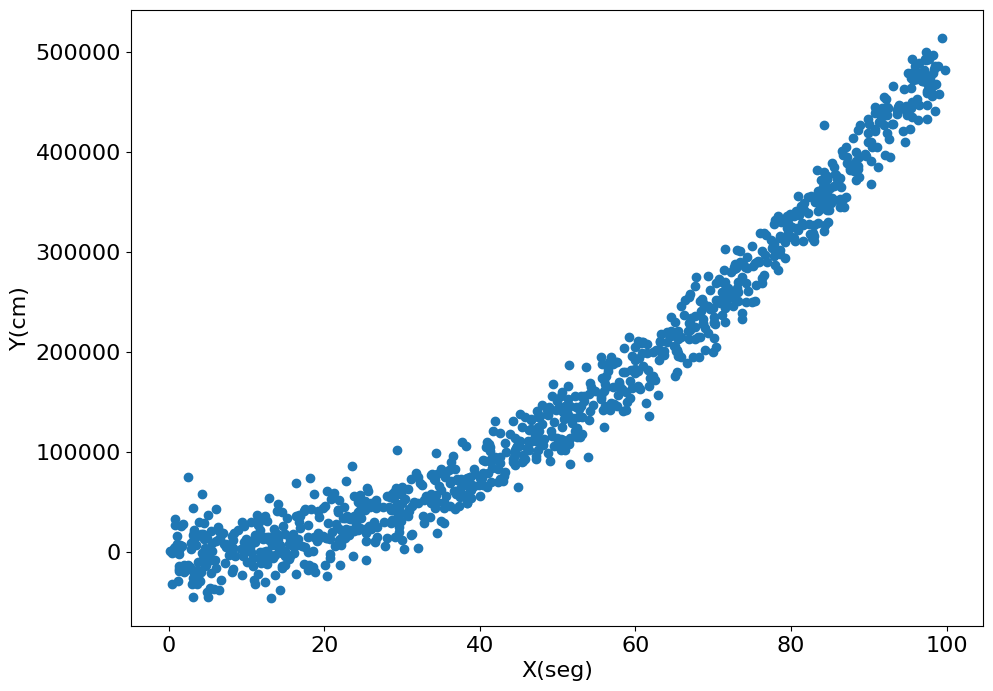

In [93]:
# Plotting y versus x

plt.figure(figsize=(11,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=4 color=red> Pregunta 4: Preparación de los datos para el entrenamiento (3 puntos)

Una vez que ya se ha simulado el conjunto de datos, es necesario normalizar y ordenar aleatoriamente los datos, este proceso se le conoce como **pre-procesamiento de datos** y es indispensable hacerlo antes de entrenar cualquier modelo de redes neuronales. Para ello, sigue los siguientes pasos:

- Genera histogramas de las variables $X$ y $Y$


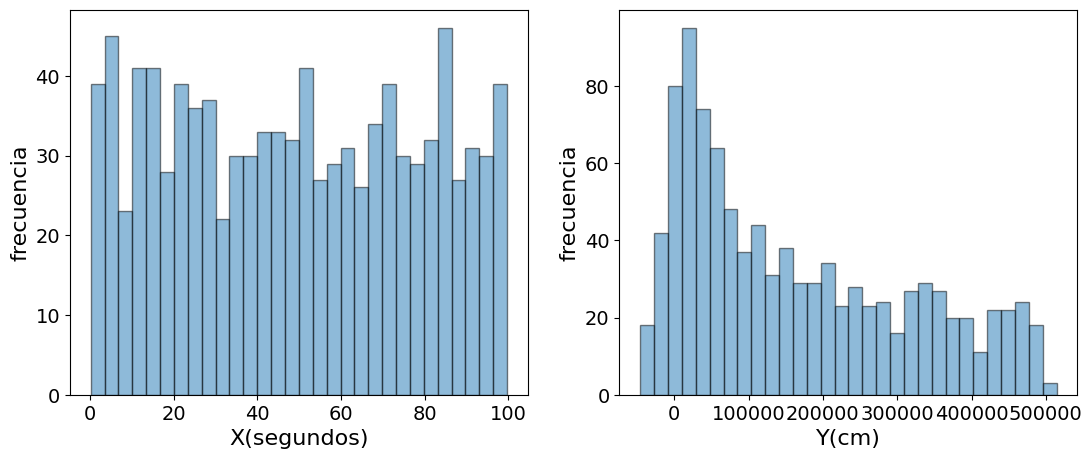

In [94]:
plt.figure(figsize=(13,5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('X(segundos)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)


plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('Y(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

- Utliza la función zip para crear pares ordenados, posteriormente utiliza la función shuffle para reordenar de forma aleatoria la posicion de los pares dentro de la lista. Finalmente, separa los pares con la función:

```python
zip(*c)
```

Utiliza lo visto en clase, al final tienes que obtener las listas $\texttt{x}$ y $\texttt{y}$.

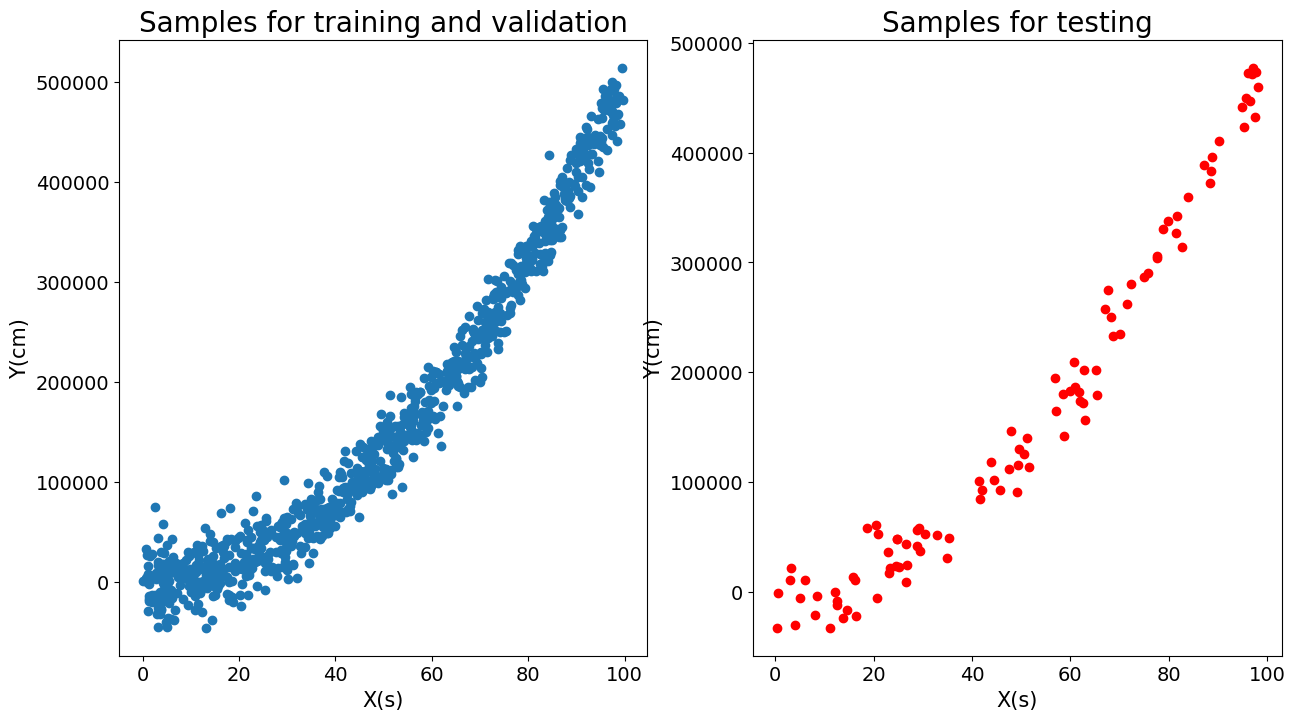

In [95]:
# Los datos se cambian de posicion aleatoriamente

from random import shuffle

c = list(zip(x, y)) 

shuffle(c)
    
(x, y) = zip(*c)

#print(len(x), len(y))

# Los datos se dividen

samples_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
#print(len(samples_train[0]), len(samples_train[1]))

samples_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(samples_train[0], samples_train[1])
plt.title('Samples for training and validation', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15)
plt.subplot(1, 2, 2)
plt.scatter(samples_test[0], samples_test[1], color='red')
plt.title('Samples for testing', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15);

- Separa el conjunto de datos en el conjunto de entrenamiento y prueba. Para ello toma el arreglo $\texttt{x}$ y el arreglo $\texttt{y}$ y crea dos tuplas, una que se llame $\texttt{muestras_ajustar}$ la cual contendra el 90% de los valores de $\texttt{x}$ y $\texttt{y}$, y la otra que se llame $\texttt{muestras_test}$ la cual contendrá el 10% restante de $\texttt{x}$ y $\texttt{y}$, tal como se hizo en clase.

Para verificar que tu procedimiento sea correcto, imprime el número total de mediciones, así como el número de muestras contenidas en $\texttt{muestras_ajustar}$ y en $\texttt{muestras_test}$.

In [96]:
from random import shuffle

c = list(zip(x, y)) 

shuffle(c)
    
(x, y) = zip(*c)

print(f'Las dimensiones del total de los datos son: {len(x), len(y)}')

Las dimensiones del total de los datos son: (1000, 1000)


In [97]:
# Los datos se dividen

muestras_ajustar = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print(f'Las dimensiones de los datos de entrenamiento son: {len(muestras_ajustar[0]), len(muestras_ajustar[1])}')

muestras_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print(f'Las dimensiones de los datos de prueba son: {len(muestras_test[0]), len(muestras_test[1])}')

Las dimensiones de los datos de entrenamiento son: (900, 900)
Las dimensiones de los datos de prueba son: (100, 100)


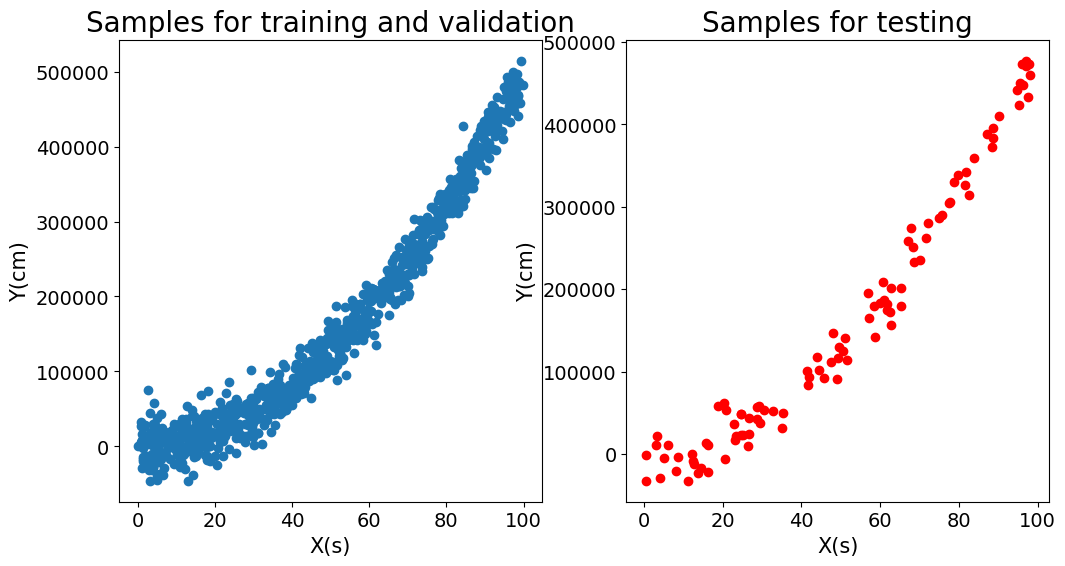

In [98]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(samples_train[0], samples_train[1])
plt.title('Samples for training and validation', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15)
plt.subplot(1, 2, 2)
plt.scatter(samples_test[0], samples_test[1], color='red')
plt.title('Samples for testing', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15);

- Normaliza el conjunto de datos de entrenamiento ($\texttt{muestras_ajustar}$), normaliza con una $\sigma$.

Para ello separa la tupla de la siguiente manera:

```python
x_ajustar = muestras_ajustar[0]
y_ajustar = muestras_ajustar[1]
```
Ahora normaliza los arreglos $\texttt{x_ajustar}$ y $\texttt{y_ajustar}$.

In [99]:
x_ajustar = muestras_ajustar[0]
y_ajustar = muestras_ajustar[1]

y_mean = np.mean(y_ajustar)
y_std = np.std(y_ajustar)

train_y = (y_ajustar-y_mean)/y_std

x_mean = np.mean(x_ajustar)
x_std = np.std(x_ajustar)

train_x = (x_ajustar-x_mean)/x_std

- Con los datos ya normalizados, vuelve a generar los histogramas de las variables $X$ y $Y$ y comparalos con los histogramas iniciales.

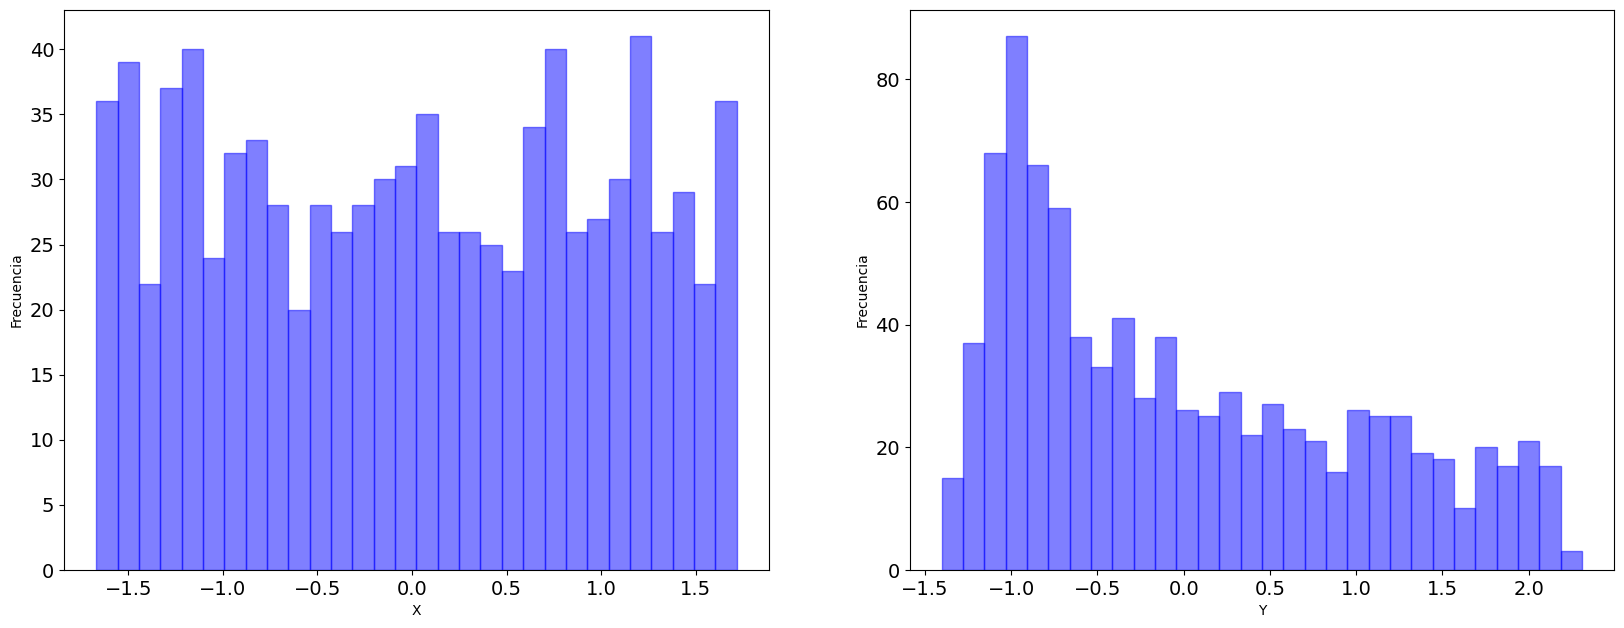

In [114]:
plt.figure(figsize=(20,16))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

plt.subplot(2, 2, 1)
plt.hist(train_x, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('X', fontsize=10)
plt.ylabel('Frecuencia',fontsize=10)


plt.subplot(2, 2, 2)
plt.hist(train_y, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Y',fontsize=10)
plt.ylabel('Frecuencia',fontsize=10);

- Normaliza el conjunto de prueba, es decir, normaliza las muestras que estan dentro del conjunto $\texttt{muestras_test}$. Nota: Recuerda que para normalizar este conjunto tienes que usar una media y desviación estándar específica, no debes utilizar la media ni la desviación estándar del conjunto de prueba. Consulta la clase 3.

In [101]:
test_y = (muestras_test[1]-y_mean)/y_std

test_x = (muestras_test[0]-x_mean)/x_std

<font size=4 color=red> Pregunta 5: Entrenamiento del **Modelo** (2 puntos)

Una vez realizado el pre-procesamiento de los datos, estamos listos para entrenar el **modelo** (realizar las iteraciones utilizando descenso de gradiente para encontrar los valores optimos de $W_1$, $W_0$ y $b$). Para ello crea una función que divida el conjunto de entrenamiento en dos una vez más, creando el subconjunto de mediciones que se usaran para el ajuste y el subconjunto de mediciones que se usaran para validar el ajuste, los cuales tendrán una proporción de 90% y 10% respectivamente. Usa el subconjunto correspondiente para optimizar $W_1$, $W_0$ y $b$ y el subconjunto restante para validar dicha optmización iteración tras iteración. Adicionalmente, tu función tiene que regresar en orden las siguientes 5 listas:
- lista que contenga los valores $W_1$ de cada época (iteración)
- lista que contenga los valores $W_0$ de cada época (iteración)
- lista que contenga los valores $b$ de cada época (iteración)
- lista que contenga los valores del error en el subconjunto de mediciones que se usaron para el ajuste por cada época
- lista que contenga los valores del error en el subconjunto de mediciones que se usaron para validar el ajuste por cada época

Finalmente, la función tine que graficar el error de el subconjunto de mediciones que se usaron para el ajuste y el error de el subconjunto de mediciones que se usaron para validar el ajuste en cada iteración.

Hint: utiliza la función $\texttt{update_parameters_1}$ de la clase 3, ten en cuenta que no puedes incorporar esta función tal cual, tienes que realizar modificaciones.

Manda llamar a la función $\texttt{update_parameters_1}$ dos veces más, usando los mismos valores de los pesos, bias, numero de iteraciones que escojiste la primera vez, pero **variando** $\alpha$. Inmprime el valor del error de la última iteración de los dos subjuntos para los tres casos en los que mandaste llamar a la función. ¿Como varian los errores de acuerdo al valor dado por $\alpha$?

Sugerencia, prueba con valores diversos, la idea es que visualices la importancia de $\alpha$.


In [102]:
#Function to update weight and bias

def update_parameters_1(x, y, weight_1, weight_0, bias, alfa, iteraciones, val_ratio=0.1):
    
    # inicializacion de parametros
    
    #x = np.squeeze(x)
    #y = np.squeeze(y)
    alfa = alfa
    residuo = 0
    d_w1 = 0.0
    d_w0 = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    plt.figure(figsize=(10,6)) 
    plt.title('MSE vs iteración', size=24)
    plt.xlabel('iteración', size=18)
    plt.ylabel('MSE', size=18)
    
    ajustar_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_ajustar = (x[0:ajustar_ratio], y[0:ajustar_ratio])
    samples_val = (x[ajustar_ratio:], y[ajustar_ratio:])
    x = samples_ajustar[0]
    y = samples_ajustar[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
       
    weights_1 = []
    weights_0 = []
    biases = []
    residuos = []
    residuos_val = []
    
    m_ajustar = len(x)
    m_val = len(x_val)
    
    for i in range(iteraciones):

        # calculo de derivadas y el residuo
        residuo = 0.0
        residuo_val = 0.0
        
        for j in range(m_ajustar):

            r = (y[j]- weight_1*x[j]*x[j] - weight_0*x[j] - bias)**2

            d_w1 += 2 * (weight_1*x[j]*x[j] + weight_0*x[j] + bias - y[j]) * x[j]*x[j]

            d_w0 += 2 * (weight_1*x[j]*x[j] + weight_0*x[j] + bias - y[j]) * x[j]
            
            d_b += 2 * (weight_1*x[j]*x[j] + weight_0*x[j] + bias - y[j])

            residuo += r

        residuo /= m_ajustar

        d_w1 /= m_ajustar

        d_w0 /= m_ajustar

        d_b /= m_ajustar
        
        #calculo del residuo de las muestras de valoración
        
        for j in range(m_val):

            r = (y_val[j]-weight_1*x_val[j]*x_val[j] - weight_0*x_val[j] - bias)**2

            #r += np.squeeze(r)
            residuo_val += r

        residuo_val /= m_val
                      
        weights_1.append(weight_1)
        weights_0.append(weight_0)
        biases.append(bias)
        residuos.append(residuo)
        residuos_val.append(residuo_val)
        
        # Actualizacion de los parametros

        weight_1 = weight_1 - alfa*d_w1
        weight_0 = weight_0 - alfa*d_w0
        bias = bias - alfa*d_b
        
        plt.scatter(i, residuo, color='blue')
        
        plt.scatter(i, residuo_val, color='orange')
        
        plt.legend(['Ajuste', 'Validation'], loc='upper right')


    return samples_ajustar, samples_val, weights_1, weights_0, biases, residuos, residuos_val

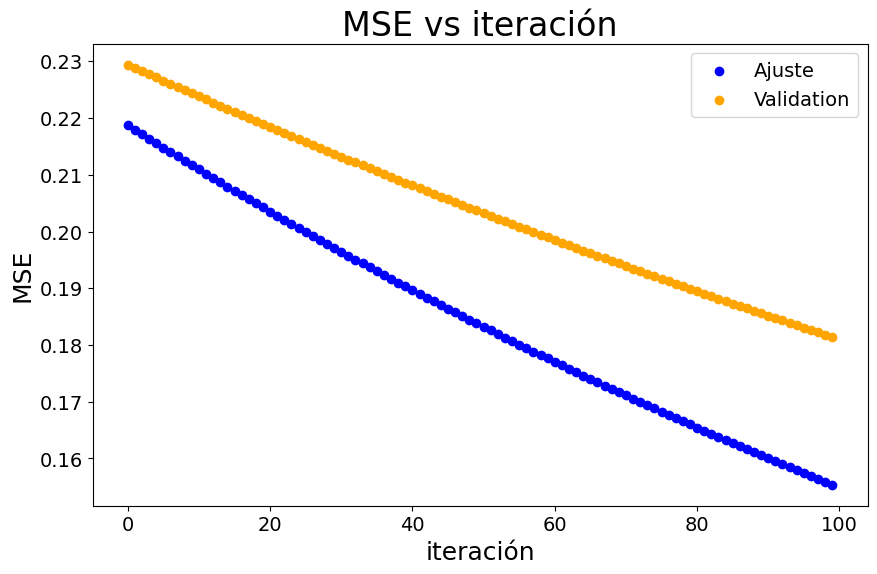

In [103]:
np.random.seed(1127)

weight_1 = np.random.random()
weight_0 = np.random.random()
bias_0 = np.random.random()
alfa = 0.001
num_iter = 100
validacion_ratio = 0.1

mediciones_ajustar, mediciones_val, weights_1, weights_0, biases, mse, mse_val = update_parameters_1 \
        (test_x, test_y, weight_1, weight_0, bias_0, alfa, num_iter, validacion_ratio)


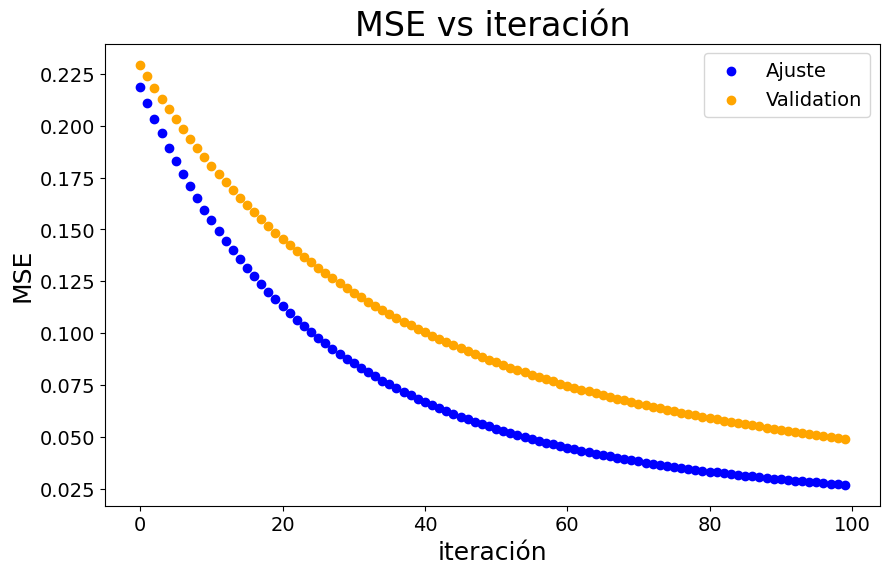

In [104]:
np.random.seed(1127)

weight_1 = np.random.random()
weight_0 = np.random.random()
bias_0 = np.random.random()
alfa = 0.01
num_iter = 100
validacion_ratio = 0.1

mediciones_ajustar, mediciones_val, weights_1, weights_0, biases, mse, mse_val = update_parameters_1 \
        (test_x, test_y, weight_1, weight_0, bias_0, alfa, num_iter, validacion_ratio)


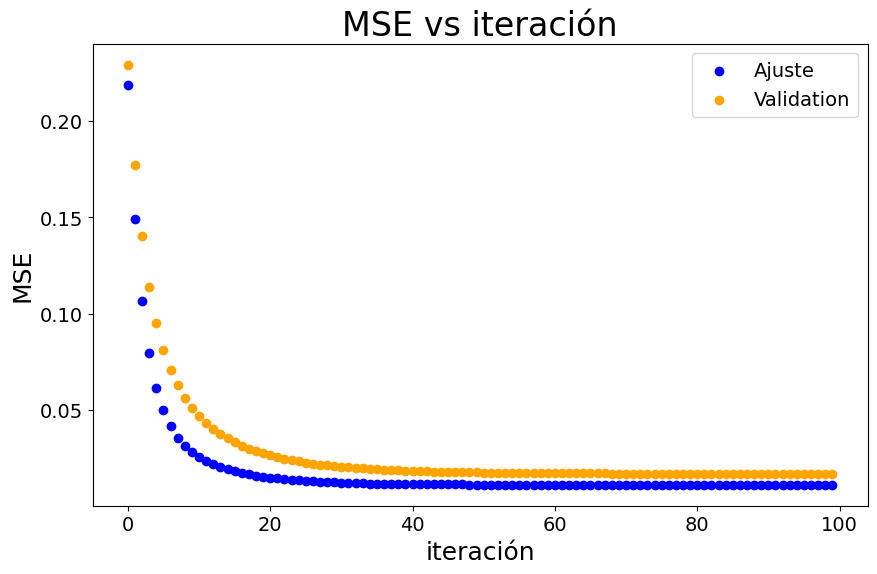

In [105]:
np.random.seed(1127)

weight_1 = np.random.random()
weight_0 = np.random.random()
bias_0 = np.random.random()
alfa = 0.1
num_iter = 100
validacion_ratio = 0.1

mediciones_ajustar, mediciones_val, weights_1, weights_0, biases, mse, mse_val = update_parameters_1 \
        (test_x, test_y, weight_1, weight_0, bias_0, alfa, num_iter, validacion_ratio)


<font size=4 color=red> Pregunta 6: Inferencia (1 punto)

Finalmente, calcula el error para el conjunto de prueba, para ello elige el mejor modelo de los tres anteriores.
Hint: leé la sección **inferencia(predicción)** de la clase 3.

Realiza inferencias con el mejor modelo. Recuerda que inicialmente los datos $X$ y $Y$ fuerón normalizados, así que hay que revertir esa opercaión, para ello basate en la función $\texttt{inference}$ de la clase 3 (recuerda adaptar la función para que se compatible con el problema que estamos atacando). Fijate muy bien que valores son: x_train_mean, x_train_std, y_train_mean, y_train_std
```python
def inference(x, w, b, x_train_mean, x_train_std, y_train_mean, y_train_std) :
    
    # reescalando la variable x
    x = (x - x_train_mean) / x_train_std
    
    y = w * x + b
    
    # reescalando el valor inferido
    y = y * y_train_std + y_train_mean
    
    return y
```
Y postertiormente, realiza inferencias para varios tiempos.


In [106]:
def loss(x, y, weight_1, weight_0, bias):
    
    r = 0

    m = len(x)
    
    for i in range(m):

        r += (y[i]-weight_1*x[i]*x[i] - weight_0*x[i] - bias)**2

    r /= m
    
    return r

In [107]:
print("loss_prueba =  %.5f" %loss(test_x, test_y, weights_1[-1], weights_0[-1],  biases[-1]))

loss_prueba =  0.01166


In [112]:
def inference(x, w1, w0, b, x_train_mean, x_train_std, y_train_mean, y_train_std) :
    
    # reescalando la variable x
    x = (x - x_train_mean) / x_train_std
    
    y = w1*x**2 + w0*x + b
    
    # reescalando el valor inferido
    y = y * y_train_std + y_train_mean
    
    return y

In [115]:
tiempos = [1.65, 32.20, 43.5, 84.7]

for t in tiempos :
    distancia = inference(x=t, w1=weights_1[-1], w0=weights_0[-1], b=biases[-1], \
                          x_train_mean = x_mean, x_train_std = x_std,\
                          y_train_mean = y_mean, y_train_std = y_std)

    print ("Para el tiempo de {0:5.2f} s la distancia inferida es {1:7.2f} cm ".\
           format(t,distancia))

Para el tiempo de  1.65 s la distancia inferida es -14555.37 cm 
Para el tiempo de 32.20 s la distancia inferida es 52926.32 cm 
Para el tiempo de 43.50 s la distancia inferida es 98575.07 cm 
Para el tiempo de 84.70 s la distancia inferida es 359636.32 cm 


<font size=4 color=blue>Punto extra: Hasta ahora hemos utilizado la función MSE para cuantificar el error en nuestros ajustes, pero esta no es la única forma de hacerlo. Investiga dos funciones de error utilizadas en IA, escribe sus ecuaciones y da una breve explicación de cada una de ellas.

**1. Error Logarítmico (Log Loss) ó Clasificación Binaria**

Es utilizada en problemas de clasificación, especialmente en clasificación binaria y multiclase, evalúa qué tan bien un modelo de clasificación predice probabilidades correctas para cada clase y la función se define como:

$$LogLoss = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$$

donde:
- $y_i$ es el valor real (0 o 1).
- $\hat{y}_i$ es la probabilidad predicha para la clase positiva.
- $n$ es el número total de muestras.


**2. Función de Pérdida Huber**

La funcion se define como:

$L_{\delta}(a) =
\begin{cases} 
\frac{1}{2} a^2, & \text{si } |a| \leq \delta \\
\delta (|a| - \frac{1}{2} \delta), & \text{si } |a| > \delta
\end{cases}
$

donde:
- $a = y_i - \hat{y}_i$ es el error residual.
- $\delta$ es un umbral que define la transición entre la pérdida cuadrática y la lineal.

Y actua haciendo que si el error es pequeño ($|a|\leq \delta$), se penaliza cuadráticamente ($a^2$), lo que ayuda a una mejor convergencia del modelo. Si el error es grande ($|a|\leq \delta$), se penaliza linealmente, haciendo que los valores atipicos o muy lejanos tengan mucho impacto en el modelo.

Se puede pensar como el MSE pero un poco mejor ya que los valores atipicos no influyen mucho.
